In [7]:
from time import sleep, time
from math import sin, cos, tan, pi
import pandas as pd 
import math
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('imu_data.csv')
len(data)

2000

In [9]:
#initialization angles
ax = data.Ax[0]
ay = data.Ay[0]
az = data.Az[0]
ax_i = math.atan2(ax, math.sqrt(ax ** 2.0 + az ** 2.0))
ay_i = math.atan2(ay, math.sqrt(ay ** 2.0 + az ** 2.0))
az_i = math.atan2(az, math.sqrt(ay ** 2.0 + ax ** 2.0))

In [10]:
data.head()

,t,Ax,Ay,Az,Gx,Gy,Gz
0,0.000000,0.098145,0.026367,0.816162,-0.679389,1.076336,-1.152672
1,0.000197,0.101562,0.030762,0.815186,-3.007634,1.854962,0.114504
2,0.019354,0.106201,0.028809,0.838867,-6.396947,2.618321,0.572519
3,0.037792,0.104004,0.042969,0.843750,-12.022901,3.877863,1.351145
4,0.056218,0.079590,0.013672,0.841797,-6.931298,3.267176,-0.099237


In [11]:
T = data.t[0:1000]

In [12]:

#Number of Iterations
timesteps = 1000
# Filter coefficient
alpha = 0.1

#Gyroscope Bias
biasx = 0.0
biasy = 0.0
biasz = 0.0

# Complimentary filter estimates
phi_hat = 0.0
theta_hat = 0.0
shi_hat = 0.0


#For angles 
phi_hat = [ax_i]
theta_hat = [ay_i]
shi_hat = [az_i]

gtx = [ax_i]
gty = [ay_i]
gtz = [az_i]

atx = [ax_i]
aty = [ay_i]
atz = [az_i]


In [13]:
for i in range(1,timesteps):
    
    # Raw accelerometer data to meaningful Data 
    ax = data.Ax[i]
    ay = data.Ay[i]
    az = data.Az[i]
    phi_hat_acc = math.atan2(ax, math.sqrt(ax ** 2.0 + az ** 2.0))
    theta_hat_acc = math.atan2(ay, math.sqrt(ay ** 2.0 + az ** 2.0))
    shi_hat_acc = math.atan2(az, math.sqrt(ay ** 2.0 + ax ** 2.0))

    # Raw gyro data to meaningful Data 
    
    x = data.Gx[i] * math.pi*(data.t[i]-data.t[i-1])/ (180.0)
    y = data.Gy[i] * math.pi*(data.t[i]-data.t[i-1]) / (180.0)
    z = data.Gz[i] * math.pi*(data.t[i]-data.t[i-1]) / (180.0)
    x -= biasx
    y -= biasy
    z -= biasz
    
    # Calculate Euler angle derivatives 
    phi_dot = x + sin(phi_hat[i-1]) * tan(theta_hat[i-1]) * y + cos(phi_hat[i-1]) * tan(theta_hat[i-1]) * z
    theta_dot = cos(phi_hat[i-1]) * y - sin(phi_hat[i-1]) * z
    shi_dot = y*(sin(phi_hat[i-1])/cos(theta_hat[i-1])) + z*(cos(phi_hat[i-1])/cos(theta_hat[i-1]))
    
    #Store values from only gyroscope
    gtx.append(phi_hat[i-1] + (data.t[i] - data.t[i-1]) * phi_dot)
    gty.append(theta_hat[i-1] + (data.t[i] - data.t[i-1]) * phi_dot)
    gtz.append(shi_hat[i-1] + (data.t[i] - data.t[i-1]) * phi_dot)
    
    
    #Store Values only from accelerometer
    atx.append(phi_hat_acc)
    aty.append(theta_hat_acc)
    atz.append(shi_hat_acc)
    
    # Update complimentary filter
    phi_hat.append((1 - alpha) * (phi_hat[i-1] + (data.t[i] - data.t[i-1]) * phi_dot) + alpha * phi_hat_acc)
    theta_hat.append((1 - alpha) * (theta_hat[i-1] + (data.t[i] - data.t[i-1]) * theta_dot) + alpha * theta_hat_acc)
    shi_hat.append((1 - alpha) * (shi_hat[i-1] + (data.t[i] - data.t[i-1])* shi_dot) + alpha * shi_hat_acc)
    
    # Display results
    #print("Phi: " + str(round(phi_hat[i] * 180.0 / pi, 1)) + " | Theta: " + str(round(theta_hat[i] * 180.0 / pi, 1)))

Text(0.5, 1.0, 'X-orientation')

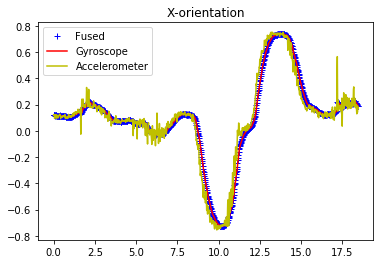

In [14]:
fig, ax = plt.subplots()
ax.plot(T,phi_hat, '+b', label='Fused')
ax.plot(T,gtx, 'r', label='Gyroscope')
ax.plot(T,atx, 'y', label='Accelerometer')
leg = ax.legend();
plt.title('X-orientation')

Text(0.5, 1.0, 'Y-orientation')

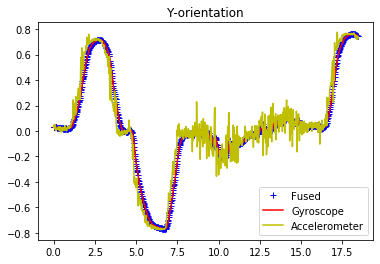

In [15]:
fig, ax = plt.subplots()
ax.plot(T,theta_hat, '+b', label='Fused')
ax.plot(T,gty, 'r', label='Gyroscope')
ax.plot(T,aty, 'y', label='Accelerometer')
leg = ax.legend();
plt.title('Y-orientation')

Text(0.5, 1.0, 'Z-orientation')

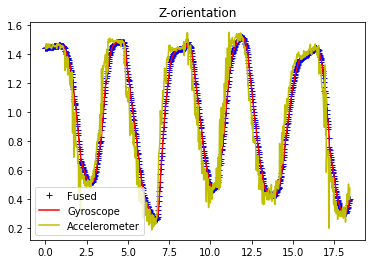

In [16]:
fig, ax = plt.subplots()
ax.plot(T,shi_hat, '+b', label='Fused')
ax.plot(T,gtz, 'r', label='Gyroscope')
ax.plot(T,atz, 'y', label='Accelerometer')
leg = ax.legend();
plt.title('Z-orientation')